In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from pandas.api.types import is_numeric_dtype, is_string_dtype
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
import math

from IPython.display import display

#### Kullanacağınız veriyi indirip, okumak

In [5]:
#reading csv file
df = pd.read_csv('seattle-weather.csv', low_memory = False)
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
df.isnull().sum()

date             0
precipitation    0
temp_max         2
temp_min         0
wind             0
weather          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1459 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [8]:
df['date'] = pd.to_datetime(df['date'])

#### Verinizin içindeki eksik ve kategorik değişkenler ile ilgilenip modele besleyeceğimiz hale getirmek

In [22]:
def fix_missing(df,col,name):
 
        if is_numeric_dtype(col):
            if pd.isnull(col).sum:
                df[name] = col.fillna(col.median())
   
     

In [23]:

def numericalize(df,col,name):
    classes={
        'drizzle':0,
        'fog':1,
        'rain':2,
        'snow':3,
        'sun':4
}
    if not is_numeric_dtype(col):
        df[name]=df[name].astype('category')
        df[name]=df[name].cat.codes
        
        

In [24]:
def total(df):
    for n,c in df.items():
        fix_missing(df,c,n)
        numericalize(df,c,n)
    return df

In [30]:
x = df.drop('weather',axis=1)
y = df['weather']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =42)

In [32]:
print("*"*40)
print("Shape of x training data : ",x_train.shape)
print("Shape of y training data : ",y_train.shape)
print("*"*40)
print("Shape of x testing data : ",x_test.shape)
print("Shape of y testing data : ",y_test.shape)
print("*"*40)

****************************************
Shape of x training data :  (1095, 7)
Shape of y training data :  (1095,)
****************************************
Shape of x testing data :  (366, 7)
Shape of y testing data :  (366,)
****************************************


In [33]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Model Denemeleri:

In [49]:
#model1
from sklearn.ensemble import RandomForestClassifier
classifier_rfc=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_rfc.fit(x_train, y_train,sample_weight=None)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [50]:
# model2
from sklearn.linear_model import LogisticRegression
classifier_log=LogisticRegression(random_state=0)
classifier_log.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [51]:
# model3
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=KNeighborsClassifier(n_neighbors = 5)
classifier_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [52]:
# model 4
from sklearn.svm import SVC
classifier_svc=SVC(kernel = 'linear', random_state=42)
classifier_svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [53]:
# model 5
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier_dtc.fit(x_train, y_train,sample_weight=None)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [54]:
classifier_list=[classifier_log,classifier_knn,classifier_svc,classifier_dtc,classifier_rfc]

In [55]:
def accuracy(X_test, Y_test, classifier):
    print(f"\nclassifier\n{classifier}")
    Y_pred=classifier.predict(X_test)
    correct=0
    total=len(Y_pred)
    for i,j in zip(Y_pred, Y_test):
        if i==j:
            correct+=1
    acc=(correct/total)*100
    print("\n"+str(acc)+"\n"+"-"*30+"\n")
    print("\n"+"*"*50+"\n"+classification_report(Y_test,Y_pred)+"\n")
    cm=confusion_matrix(Y_test,Y_pred)
    print(f"Confusion Matrix\n{cm}\n")
    return acc

In [56]:
accuracy_list=[]
classifier_list_str=[]

In [59]:
for clf in classifier_list:
    acc=accuracy(x_test, y_test, clf)
    accuracy_list.append(acc)
    classifier_list_str.append(str(clf)[:6])    


classifier
LogisticRegression(random_state=0)

79.23497267759562
------------------------------


**************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       1.00      0.03      0.06        30
           2       0.89      0.86      0.87       161
           3       1.00      0.12      0.22         8
           4       0.72      0.96      0.82       156

    accuracy                           0.79       366
   macro avg       0.72      0.40      0.40       366
weighted avg       0.80      0.79      0.74       366


Confusion Matrix
[[  0   0   2   0   9]
 [  0   1   2   0  27]
 [  0   0 139   0  22]
 [  0   0   7   1   0]
 [  0   0   7   0 149]]


classifier
KNeighborsClassifier()

72.95081967213115
------------------------------


**************************************************
              precision    recall  f1-score   support

           0       0.44      0.36

C:\Users\vatan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vatan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vatan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vatan\anaconda3\lib\site-packages\sklearn\metr

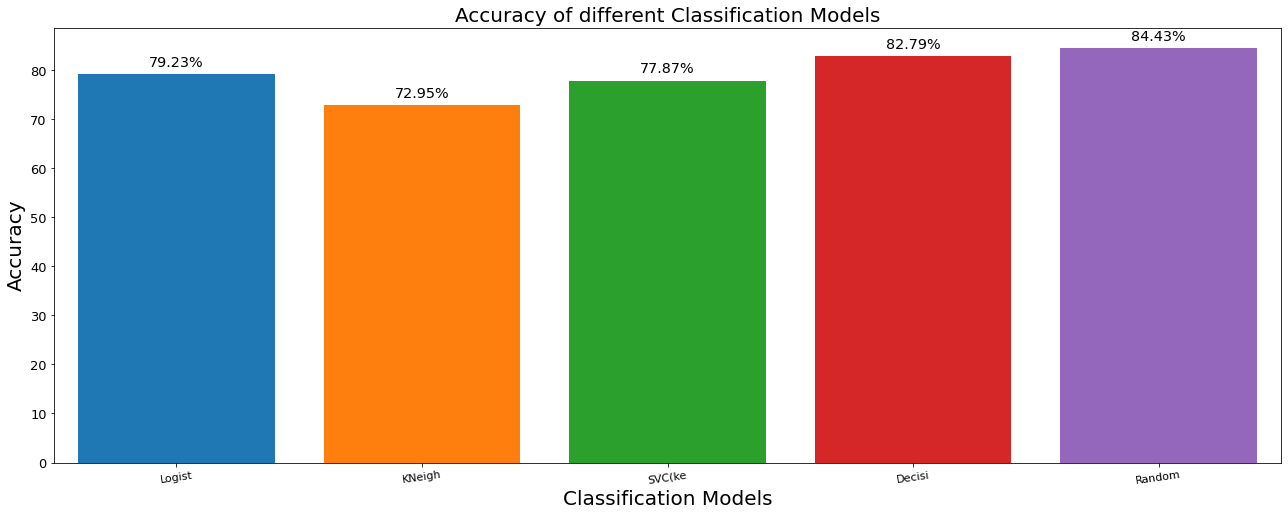

In [58]:
plt.figure(figsize=(22,8))
ax = sns.barplot(x=classifier_list_str, y=accuracy_list, saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/100:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()